# Numerical solution of ODEs - Python Library

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Python libraries and functions for ODEs

Scipy provides the "integrate" module for ODEs, whose documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/integrate.html). 

For IVP of an ODE system, it provides
* odeint (obsolete)
* solve_ivp (new) 
* RK23
* RK45
* ...

For BVP of an ODE system, it provides "solve_bvp"


### IVP example

The following example use the "odeint" function to solve the prey and predator model or Lokta-Voltera model.

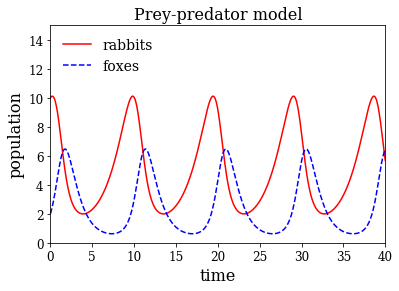

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


# du/dt =  a*u -   b*u*v
# dv/dt = -c*v + d*b*u*v 

# *  u: number of preys (for example, rabbits)
# 
# *  v: number of predators (for example, foxes)  
#   
# * a, b, c, d are constant parameters defining the behavior of the population:    
# 
#   + a is the natural growing rate of rabbits, when there's no fox
# 
#   + b is the natural dying rate of rabbits, due to predation
# 
#   + c is the natural dying rate of fox, when there's no rabbit
# 
#   + d is the factor describing how many caught rabbits let create a new fox

def dF_dt(F, t, alpha1,beta1,alpha2,beta2):
    return [ alpha1*F[0] - beta1*F[0]*F[1], -alpha2*F[1] + beta2*F[0]*F[1]]


alpha1= 0.5
beta1= 0.2
alpha2= 1.0
beta2=0.2

t = np.linspace(0, 40, 1000)              # time
F0 = [10, 2]                   # initials conditions: number of rabbits and foxes  

F, infodict = integrate.odeint(dF_dt, F0, t, args=(alpha1,beta1,alpha2,beta2), full_output=True)

rabbits, foxes = F.T

plt.plot(t, rabbits, 'r-', label='rabbits')
plt.plot(t, foxes  , 'b--', label='foxes')

#set the limit for the x and y axes
plt.xlim([0,40])
plt.ylim([0,15])

#set x and y axes label and font size
plt.xlabel('time',fontsize=16)
plt.ylabel('population',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Prey-predator model',fontsize=16)

#plt.grid()

#show legend, set its location, font size, and turn off the frame
plt.legend(loc='upper left',fontsize=14,frameon=False)
plt.savefig("prey-predator-model.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()


### BVP example

The following exmaple shows how to solve a BVP using "ode_bvp".

\begin{equation}
  \frac{d^2y}{dx^2}=\frac{dy}{dx} + y
\end{equation}
with boundary conditions
\begin{equation}
   y(0) = 0 \textrm{ and } y(1) =1
\end{equation}

The second-order ODE can be written as a first-order ODE system by introducing
\begin{equation}
   y_0 = y
\end{equation}
\begin{equation}
   y_1 = \frac{dy}{dx}
\end{equation}
Then, the ODE system is
\begin{equation}
   \frac{d y_0}{dx} = y_1
\end{equation}
\begin{equation}
   \frac{d y_1}{dx} = y_0 + y_1
\end{equation}

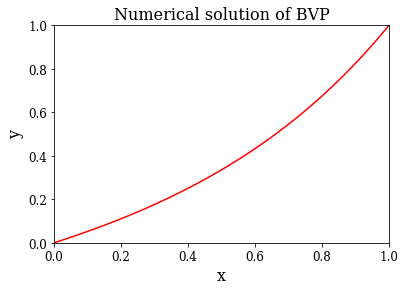

In [8]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

def fun(x, y):
    return np.vstack((y[1],y[0]+y[1]))

def bc(ya, yb):
    return np.array([ya[0], yb[0]-1])

x = np.linspace(0, 1, 10)

y = np.zeros((2, x.size))

sol = solve_bvp(fun, bc, x, y)

x_plot = np.linspace(0, 1, 100)
y_plot = sol.sol(x_plot)[0]

plt.plot(x_plot, y_plot, 'r')

#set the limit for the x and y axes
plt.xlim([0,1])
plt.ylim([0,1])

#set x and y axes label and font size
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

#show title and set font size
plt.title('Numerical solution of BVP',fontsize=16)

#plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show()